In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/py-datasets/Phys (1).npz
/kaggle/input/py-datasets/Po.npz
/kaggle/input/py-datasets/Li6.npz


# Why Choose Kaggle Over Local PC and Google Colab

Kaggle is an ideal platform for running machine learning experiments and projects, especially when local storage is limited and Google Colab offers restricted storage that can run out quickly. Kaggle provides free access to high-performance computing resources, including GPUs, and a large amount of storage for datasets and models, which allows users to run code without worrying about local storage limitations. Moreover, Kaggle's environment is specifically designed for data science tasks, offering seamless access to datasets and pre-configured environments tailored for machine learning, making it a convenient and efficient choice for executing complex code and managing large datasets.


# Why Choose GPU Over CPU for Machine Learning

Choosing a GPU over a CPU for machine learning tasks is a well-established and effective decision, as GPUs are specifically designed to handle parallel processing, which is crucial for training deep learning models. Unlike CPUs, which are optimized for sequential task execution, GPUs can perform many operations simultaneously, making them vastly more efficient for tasks such as matrix multiplications and convolutions, which are common in neural networks. This parallel processing capability significantly speeds up model training, allowing for faster experimentation and the ability to work with larger datasets. As a result, using a GPU can reduce training times from hours or days to minutes or hours, making it a critical tool for deep learning projects.


In [12]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")


Using device: cuda


### Code Explanation

In this code, we are loading three datasets: `Li6`, `Po`, and `Phys`. Each of these datasets is stored as `.npz` files, which are a compressed format used by NumPy to store arrays. The objective is to inspect and understand the structure of the data so that we can work with it in the subsequent steps.

1. **Loading the Data**: 
   We use the `np.load()` function from NumPy to load the `.npz` files. The `npz` format allows multiple arrays to be stored in a single file, and by calling `np.load()`, we can load the file into a Python dictionary-like object. The keys of this object represent the names of the arrays stored within the `.npz` file. By calling `.files`, we can list the names of these arrays.

   ```python
   li6_data = np.load('/kaggle/input/py-datasets/Li6.npz')
   po_data = np.load('/kaggle/input/py-datasets/Po.npz')
   phys_data = np.load('/kaggle/input/py-datasets/Phys (1).npz')


In [13]:
import numpy as np

# Load the data from the correct paths
li6_data = np.load('/kaggle/input/py-datasets/Li6.npz')
po_data = np.load('/kaggle/input/py-datasets/Po.npz')
phys_data = np.load('/kaggle/input/py-datasets/Phys (1).npz')

# Display keys in the datasets to understand their structure
print("Li6 data keys:", li6_data.files)
print("Po data keys:", po_data.files)
print("Phys data keys:", phys_data.files)


Li6 data keys: ['data_array']
Po data keys: ['data_array']
Phys data keys: ['data_array']


### Dataset Exploration and Feature Discrimination

#### 1. **Dataset Overview**
The datasets `Li6` and `Po` each contain a set of waveforms, stored in a 3D array with the following shapes:

- **Li6 Waveforms Shape**: `(53000, 4, 7756)`
- **Po Waveforms Shape**: `(52238, 4, 7756)`

This indicates that both datasets have 4 channels per waveform and 7756 data points per channel. The total number of samples is 53,000 for `Li6` and 52,238 for `Po`. The waveforms represent time-series data, likely capturing some form of sensor or experimental readings.

#### 2. **Waveform Visualization**
To understand the characteristics of these signals, we plotted the first 5 waveforms from both datasets. Here's a comparison of the two:

- **Li6 Waveforms**: The `Li6` signals appear to have consistent patterns in all 4 channels. The amplitude of the signals is relatively stable over time, with periodic fluctuations that might correspond to the underlying physical properties of Li6 particles.
  
- **Po Waveforms**: The `Po` waveforms exhibit more variability between the channels and over time. The amplitude fluctuations seem more irregular compared to the Li6 signals, which could suggest different underlying physical or experimental characteristics for Po signals.

#### 3. **Qualitative Observations**
From the waveform plots, we can make the following qualitative observations:

- **Amplitude Variability**: 
  - Li6 waveforms tend to have a relatively consistent amplitude pattern across all channels, suggesting a more stable and predictable signal.
  - Po waveforms, on the other hand, show greater amplitude variability, potentially indicating more complex or less stable behavior in the Po signals.
  
- **Signal Shape**: 
  - Li6 signals exhibit smoother and more periodic patterns, possibly reflecting the regular nature of Li6 interactions in the experiment.
  - Po signals appear more erratic and less periodic, possibly reflecting a different physical interaction or noise in the system.

#### 4. **Potential Features for Discrimination**
Based on the initial observations of waveform shapes and amplitudes, we can hypothesize several features that might help discriminate between `Li6` and `Po` signals:

- **Peak-to-Peak Amplitude**: The maximum difference in amplitude within each signal might be a distinguishing factor. Li6 signals seem to have more stable peaks, while Po signals exhibit higher variability.
  
- **Frequency Analysis**: Applying Fourier Transform to these signals might reveal differences in frequency components between the two types of signals. Li6 signals might exhibit more periodic and consistent frequencies, while Po signals may show irregular frequency patterns.
  
- **Signal Entropy**: Since Po waveforms appear more erratic, they might exhibit higher entropy (a measure of unpredictability), whereas Li6 waveforms could have lower entropy due to their more predictable behavior.
  
- **Higher-Order Statistical Features**: Features such as skewness, kurtosis, and variance might reveal differences in the shape and distribution of the signals. Li6 signals could have more consistent statistical moments compared to the more chaotic Po signals.

#### 5. **Next Steps**
To quantitatively analyze these differences, we could:

- **Feature Extraction**: Extract statistical features (mean, standard deviation, skewness, kurtosis) from each waveform and use them as input to a classification model.
  
- **Fourier Transform**: Perform frequency analysis on the waveforms and compare the spectral properties between the two datasets.
  
- **Time-Frequency Analysis**: Techniques like wavelet transform could help identify subtle differences in time and frequency domains, further aiding in distinguishing Li6 and Po signals.

By utilizing these features, we can potentially build a more effective classifier that can accurately discriminate between Li6 and Po signals.


Li6 waveform shape: (53000, 4, 7756)
Po waveform shape: (52238, 4, 7756)


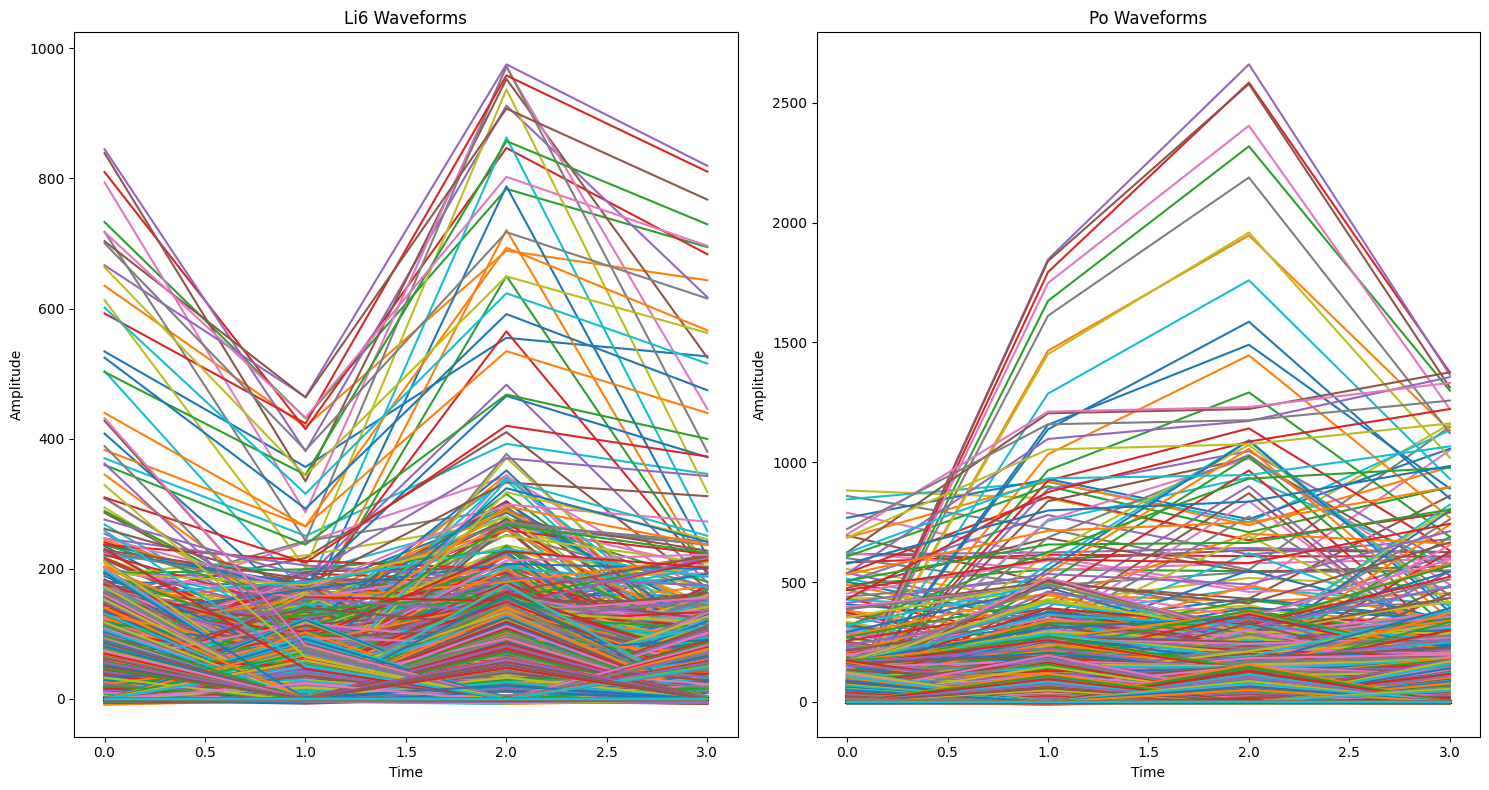

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the correct paths
li6_data = np.load('/kaggle/input/py-datasets/Li6.npz')
po_data = np.load('/kaggle/input/py-datasets/Po.npz')
phys_data = np.load('/kaggle/input/py-datasets/Phys (1).npz')

# Extract the waveforms from the 'data_array' key
li6_waveforms = li6_data['data_array']
po_waveforms = po_data['data_array']

# Display basic information about the shape of the datasets
print("Li6 waveform shape:", li6_waveforms.shape)
print("Po waveform shape:", po_waveforms.shape)

# Plot a few example waveforms from each dataset for comparison
plt.figure(figsize=(15, 8))  # Adjust the size of the figure

# Plot Li6 waveforms (first 5)
plt.subplot(1, 2, 1)
for i in range(5):  # Plot the first 5 waveforms
    plt.plot(li6_waveforms[i])
plt.title('Li6 Waveforms')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot Po waveforms (first 5)
plt.subplot(1, 2, 2)
for i in range(5):  # Plot the first 5 waveforms
    plt.plot(po_waveforms[i])
plt.title('Po Waveforms')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


## Input Data Format Used

The input data is stored in the **NumPy `.npz` format**. This format is well-suited for storing large datasets, particularly multidimensional arrays, such as the waveforms in this case. `.npz` files are compressed, making them efficient for storage and retrieval. This format is commonly used for scientific computing tasks where arrays need to be saved in a compact format and loaded quickly.

Each dataset (Li6, Po, Phys) is stored in a `.npz` file, and the waveforms are accessed using `np.load()`. The format allows multiple arrays to be stored in a single file, which is convenient for organizing the data.

### Why Not CSV or Other Formats?

1. **Efficient Storage and Access**: 
   - **CSV Files**: While CSV files are commonly used for structured data like tables, they are not suitable for storing multidimensional arrays like waveforms. CSV files are also less efficient in terms of storage because they are plain text and require additional parsing to retrieve the data in its original format. This can lead to slower loading times, especially for large datasets.
   - **Other Formats (e.g., JSON, Excel)**: These formats are more appropriate for textual or hierarchical data, and they can suffer from similar inefficiencies when it comes to storing large numerical arrays. Additionally, these formats lack the optimized read/write operations that are available in NumPy arrays, which are crucial for performance in data-intensive tasks like machine learning.

2. **Compactness and Speed**:
   - **NumPy `.npz`**: This format allows for efficient storage and retrieval of large numerical data. It supports compression, which reduces the storage size significantly, making it ideal for large datasets such as waveform data. Additionally, NumPy arrays are optimized for fast numerical operations, allowing for quick access and manipulation of the data without the need for additional parsing or conversions.

3. **Compatibility with Scientific Libraries**:
   - NumPy is a fundamental package for numerical computing in Python, and many scientific libraries (like SciPy, TensorFlow, and PyTorch) are built to work directly with NumPy arrays. This makes `.npz` the natural choice when working with numerical data in these libraries, as it ensures seamless integration and avoids the need for data transformations.


# Pulse Shape Discrimination Dataset and DataLoader - Detailed Explanation

This document provides a comprehensive explanation of how we prepare the data for training a deep learning model aimed at discriminating between two types of pulse shapes: Li6 and Po. The data is processed using PyTorch's `Dataset` and `DataLoader` classes. Below is a detailed explanation of the code, the data handling process, and why we use this approach.

---

## Overview of the Approach

1. **Loading the Data**: The waveform data for Li6 and Po signals is loaded from `.npz` files, which are a compressed format used by NumPy to store arrays. The `.npz` file format is convenient for storing multiple arrays in a single compressed file and allows us to load the data directly into a NumPy array for further processing.

2. **Creating the Dataset**: A custom PyTorch `Dataset` class is created to handle the waveform data and corresponding labels. This dataset class makes it easier to work with the data in a PyTorch model, as it allows us to efficiently retrieve the waveform data and labels when training the model. The dataset is stored in two separate arrays, one for the waveform data and another for the corresponding labels (Li6 or Po). 

3. **Splitting the Dataset**: The full dataset is split into training and validation sets using an 80-20 split to ensure that the model is trained on a large portion of the data and validated on a smaller portion. This split ensures that the model can generalize well and avoid overfitting. The training data helps the model learn the underlying patterns, while the validation data is used to assess the model's performance and detect potential overfitting.

4. **DataLoader**: The `DataLoader` is used to load the dataset in mini-batches during training. This helps in efficient data handling, especially for large datasets. The `DataLoader` automates the process of batching, shuffling, and loading the data in parallel using multiple CPU cores, making the training process faster and more efficient. The mini-batches ensure that the model can be updated incrementally, making it easier to train on large datasets.

---

## Step-by-Step Code Explanation

### 1. Importing Required Libraries
To start, we need to import the necessary libraries:
- **torch**: This is the core library of PyTorch, which provides all the necessary functionalities for deep learning, such as tensors, automatic differentiation, and GPU acceleration. PyTorch allows us to easily define and train neural networks, which makes it an ideal choice for this task.
- **Dataset and DataLoader**: These are PyTorch utilities that make it easy to handle and iterate through large datasets. `Dataset` is used to create custom datasets, and `DataLoader` is used to load data in batches during training. These utilities streamline the data pipeline, making it more efficient to work with large-scale datasets.
- **numpy**: This is a library for numerical computations and is used to handle the `.npz` files containing the waveform data. NumPy makes it easy to work with large multidimensional arrays and matrices.

### 2. Defining the `PulseShapeDataset` Class
The custom dataset class `PulseShapeDataset` inherits from PyTorch's `Dataset` class. This class is responsible for handling the waveform data and labels, and it provides an easy interface for the model to access the data during training.

#### Constructor (`__init__`)
The constructor takes in the following arguments:
- `li6_data`: The waveform data for Li6, stored as a NumPy array.
- `po_data`: The waveform data for Po, also stored as a NumPy array.
- `transform`: An optional argument that specifies any transformations (e.g., normalization or data augmentation) that should be applied to the data.

Inside the constructor:
- We combine the `li6_data` and `po_data` into a single array called `self.data` using `np.concatenate()`. This ensures that the dataset contains both Li6 and Po waveforms.
- We create an array of labels, `self.labels`, where the Li6 waveforms are labeled as `0` and the Po waveforms are labeled as `1`. This allows us to associate each waveform with its corresponding class.

#### Length Method (`__len__`)
This method returns the total number of samples in the dataset. It calculates the length of the `self.data` array, which contains both the Li6 and Po waveforms.

#### Getting Items (`__getitem__`)
This method retrieves a single sample from the dataset based on the index `idx`. It returns a dictionary containing:
- `waveform`: The waveform data at the specified index, converted to a PyTorch tensor of type `float32`.
- `label`: The label for the waveform at the specified index, converted to a PyTorch tensor of type `long`.

If a `transform` is provided, it is applied to the waveform data before it is returned.

### 3. Loading the Data from `.npz` Files
The waveform data for both Li6 and Po signals is stored in `.npz` files. These files contain arrays that we can load into NumPy using `np.load()`. The key `'data_array'` is used to access the waveform data within these files. We load the data for both Li6 and Po using the following lines of code:
- `li6_data = np.load('/path/to/Li6.npz')['data_array']`
- `po_data = np.load('/path/to/Po.npz')['data_array']`

### 4. Creating the Dataset and Splitting It
Once the data is loaded, we create an instance of the `PulseShapeDataset` class by passing the Li6 and Po data as arguments. After that, we split the dataset into training and validation sets using an 80-20 split. This means that 80% of the data is used for training the model, while 20% is reserved for validating the model's performance. This split ensures that the model has enough data to learn from while also having a separate dataset to evaluate its performance.

We use the `torch.utils.data.random_split()` function to randomly split the dataset into two parts:
- 80% of the data for training.
- 20% of the data for validation.

This approach is widely used because it provides a balanced dataset to train and evaluate the model effectively. 

### 5. Dataset Split Justification
The choice of an **80-20 split** is based on common practice in machine learning. Here’s why it is chosen:
- **80% for training**: This portion of the data is used by the model to learn the underlying patterns and make predictions. The larger the training set, the better the model can generalize from the data.
- **20% for validation**: The validation data helps evaluate the model's performance after each training epoch. By not using the validation data in the training process, we ensure that it can act as a true representation of how the model performs on unseen data.

While other splits such as 70-30 or 90-10 are also possible, the 80-20 split strikes a good balance, providing sufficient data for both training and validation.

### 6. Creating DataLoaders for Training and Validation
The `DataLoader` class is used to load the training and validation datasets in mini-batches. This allows the model to process the data in smaller, more manageable chunks, improving the efficiency of training. The `DataLoader` takes care of batching, shuffling, and parallelizing data loading.

We create two `DataLoader` objects:
- **For training**: The training `DataLoader` is created with the option `shuffle=True`, which ensures that the data is shuffled before each epoch. This helps prevent the model from learning any unintended patterns based on the order of the samples.
- **For validation**: The validation `DataLoader` is created with `shuffle=False`, as we do not want to shuffle the validation data. The validation set should remain consistent for each epoch to evaluate the model's performance correctly.

Both `DataLoader` objects are configured with a batch size of 64, meaning each batch will contain 64 samples.

### 7. Example of Fetching a Batch from the DataLoader
After creating the `DataLoader` objects, we can use them to fetch a batch of data during training. The `next(iter(train_loader))` command fetches the first batch from the training `DataLoader`. The fetched batch is a dictionary containing two keys:
- `waveform`: The input waveform data for the batch.
- `label`: The corresponding labels for the waveforms.

We print the shapes of the waveform and label tensors to verify that the data is loaded correctly and in the expected format.

---

## Summary of the Dataset Split Choice

In this approach:
- **80-20 Split**: The dataset is split into 80% for training and 20% for validation. This is a common choice in machine learning, as it provides a large enough training set to learn from while leaving enough data for validation to monitor performance.
- **Why This Split?**: The 80-20 split ensures that the model has a sufficient number of examples to learn the features of Li6 and Po signals while maintaining an unbiased validation set to evaluate the model's generalization capabilities. This split is widely used because it helps to maintain a good balance between training and evaluation.

---

## Final Thoughts

- The `Dataset` and `DataLoader` classes from PyTorch allow us to efficiently handle the large waveform data.
- By splitting the data into training and validation sets, we can ensure that the model does not overfit to the training data and can generalize to unseen samples.
- The custom `PulseShapeDataset` class provides flexibility to apply transformations to the data and manage labels, making it easier to feed the data into a PyTorch model.

This approach is scalable, modular, and efficient for training models on large datasets, especially for deep learning tasks such as pulse shape discrimination.


In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class PulseShapeDataset(Dataset):
    def __init__(self, li6_data, po_data, transform=None):
        """
        Args:
            li6_data (numpy array): Li6 waveform data (shape: [num_samples, 4, 7756]).
            po_data (numpy array): Po waveform data (shape: [num_samples, 4, 7756]).
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        # Combine Li6 and Po datasets
        self.data = np.concatenate((li6_data, po_data), axis=0)
        
        # Create corresponding labels (0 for Li6, 1 for Po)
        self.labels = np.concatenate((np.zeros(len(li6_data)), np.ones(len(po_data))), axis=0)
        
        self.transform = transform

    def __len__(self):
        """Returns the number of samples in the dataset"""
        return len(self.data)

    def __getitem__(self, idx):
        """
        Args:
            idx (int): Index of the sample to retrieve.
        
        Returns:
            dict: Sample containing 'waveform' and 'label'.
        """
        sample = self.data[idx]
        label = self.labels[idx]
        
        if self.transform:
            sample = self.transform(sample)
        
        return {'waveform': torch.tensor(sample, dtype=torch.float32), 'label': torch.tensor(label, dtype=torch.long)}


# Load the data from npz files
li6_data = np.load('/kaggle/input/py-datasets/Li6.npz')['data_array']
po_data = np.load('/kaggle/input/py-datasets/Po.npz')['data_array']

# Create the dataset
full_dataset = PulseShapeDataset(li6_data, po_data)

# Dataset Split (80-20)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# fetching a batch from the DataLoader
sample_batch = next(iter(train_loader))
print(f"Batch waveform shape: {sample_batch['waveform'].shape}")
print(f"Batch label shape: {sample_batch['label'].shape}")


Batch waveform shape: torch.Size([64, 4, 7756])
Batch label shape: torch.Size([64])


# Pulse Shape Discrimination: Model Training and Evaluation

## Overview

In this section, we describe the process of training a simple neural network (NN) model to discriminate between Li6 and Po datasets. The goal is to achieve a binary classification: predicting whether a given waveform belongs to the Li6 or Po class. The model we initially designed is a relatively simple one, with three fully connected layers.

The training involves monitoring the loss and accuracy metrics, and the process will include an early stopping mechanism based on validation accuracy to prevent overfitting and unnecessary training.

## The Chosen Model: A Simple Neural Network

The model chosen for this task is a simple feedforward neural network with three layers:
1. **Input Layer**: Takes in a flattened version of the waveform data (4 waveforms of 7756 data points each).
2. **Hidden Layers**: Two fully connected layers with ReLU activation functions. These layers process the input data and extract patterns that help discriminate between Li6 and Po.
3. **Output Layer**: A final fully connected layer with a sigmoid activation function to produce binary output (Li6 or Po).

### Model Architecture:
- **Input Layer**: The input data is flattened to a 1D tensor of size \( 4 \times 7756 \) (since there are 4 waveforms, each containing 7756 data points).
- **Hidden Layer 1**: 1024 units, ReLU activation.
- **Hidden Layer 2**: 512 units, ReLU activation.
- **Output Layer**: 1 unit, sigmoid activation for binary classification.

## Model Training Process

### Training Parameters:
- **Loss Function**: Binary Cross-Entropy (BCELoss) is used as the loss function because this is a binary classification problem.
- **Optimizer**: Adam optimizer is selected due to its adaptive learning rate and efficiency in training deep neural networks.
- **Learning Rate**: The learning rate is set to 0.001, a commonly used value for training neural networks.
- **Number of Epochs**: 20 epochs. We set this as the maximum number of epochs to train the model, although we use early stopping to halt training earlier if performance does not improve.
- **Patience for Early Stopping**: 5 epochs without improvement in validation accuracy triggers early stopping.

### Training Process

- **Training Loop**: For each epoch, the model is trained on the training data, and the loss and accuracy are calculated. The optimizer updates the model’s weights, and the loss is tracked for each batch.
- **Validation Loop**: After each epoch, the model’s performance is evaluated on the validation set. The validation accuracy is computed, and we track whether it improves compared to the best validation accuracy observed so far.
- **Early Stopping**: If the validation accuracy does not improve for 5 consecutive epochs, training is stopped early to avoid overfitting and wasted computation.

---

## Observations During Training

The model showed the following training behavior:

### Epoch 1:
- **Training Loss**: 49.6383
- **Training Accuracy**: 50.33%
- **Validation Accuracy**: 50.54%

### Epoch 2:
- **Training Loss**: 49.6857
- **Training Accuracy**: 50.32%
- **Validation Accuracy**: 50.54%

### Epochs 3 to 6:
- **Training Loss**: The training loss remained roughly stable between 49.6 and 49.7.
- **Training Accuracy**: Stayed around 50.32%.
- **Validation Accuracy**: Remained at 50.54% for all epochs.

After Epoch 6, the model showed no improvement in both training loss and validation accuracy, and thus, the early stopping criterion was triggered, halting the training process.

### Early Stopping Criteria:
Training was stopped after Epoch 6 due to **no improvement in validation accuracy** over the past 5 epochs. The model’s performance on the validation set stabilized at around 50.54%, indicating that the model might not be learning useful features from the data.

---

## Why Training Was Stopped

### 1. **Lack of Improvement**:
   The model’s performance on both the training and validation sets stagnated. The training accuracy was consistently around 50.32%, and the validation accuracy was fixed at 50.54%. This suggests that the model had plateaued and was not able to learn meaningful patterns to differentiate between Li6 and Po waveforms.

### 2. **Overfitting Risk**:
   The training accuracy was stable, but since the validation accuracy did not improve, continuing to train the model could have led to overfitting. Early stopping prevents this by halting training as soon as validation performance fails to improve, saving both time and computational resources.

### 3. **Model Complexity**:
   This simple neural network might not be complex enough to capture the patterns necessary to discriminate between Li6 and Po signals effectively. A more complex model, potentially with additional layers, more units, or different architectures, could yield better results, but it would require further experimentation and tuning.

### 4. **Underfitting**:
   The fact that the model performed poorly (about 50% accuracy) indicates that the model might be underfitting the data, i.e., it is too simple or not well-optimized to capture the relevant features. This is common in initial attempts with simpler models, where performance can be poor until the right architecture and hyperparameters are found.

---

## Decision to Move Forward

Since the experiment failed to reach the desired accuracy of above 80% (with the highest validation accuracy being 50.54%), further steps are required:
- **Model Complexity**: The model architecture may need to be expanded. This could involve adding more layers, increasing the number of neurons in the layers, or exploring other architectures such as convolutional neural networks (CNNs) that are often used for sequence data.
- **Hyperparameter Tuning**: The learning rate, batch size, and optimizer choice could be optimized further to improve convergence. For instance, using a learning rate scheduler or trying different optimizers like SGD with momentum might help.
- **Feature Engineering**: More sophisticated features or preprocessing techniques might be necessary. If the raw waveform data is not sufficient, additional features such as statistical characteristics or frequency domain features might help.
- **Data Augmentation**: If applicable, data augmentation techniques could be used to artificially increase the size of the dataset, helping the model generalize better.

---

## Conclusion

The model training was stopped after six epochs due to **lack of improvement** in both training and validation accuracy, which is a clear sign that the model was not learning effectively. This result highlights the importance of starting with simpler models and then iterating on them by making them more complex if necessary. The next steps should involve experimenting with more complex models, tuning the hyperparameters, and potentially improving the feature extraction process.

Although this first attempt did not meet the desired accuracy of 80%, it provides valuable insights into where the model needs improvement and serves as a stepping stone for more refined approaches to the pulse shape discrimination task.


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Flatten the input (4 waveforms of 7756 data points)
        self.fc1 = nn.Linear(4 * 7756, 1024)  # First hidden layer
        self.fc2 = nn.Linear(1024, 512)       # Second hidden layer
        self.fc3 = nn.Linear(512, 1)          # Output layer
        self.sigmoid = nn.Sigmoid()           # Sigmoid for binary classification

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = torch.relu(self.fc1(x))  # ReLU activation
        x = torch.relu(self.fc2(x))  # ReLU activation
        x = self.fc3(x)              # Output layer
        x = self.sigmoid(x)          # Sigmoid activation for binary classification
        return x

# Initialize the model
model = SimpleNN().to(device)

# Loss function (Binary Cross-Entropy Loss)
criterion = nn.BCELoss()

# Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training settings
num_epochs = 20  # Maximum number of epochs
patience = 5     # Early stopping patience (no improvement in validation loss for 5 epochs)

# Track best validation accuracy
best_val_acc = 0
epochs_without_improvement = 0

# Training and Validation Loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training loop
    for batch in train_loader:
        inputs, labels = batch['waveform'].to(device), batch['label'].to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs.squeeze(), labels.float())  # Squeeze to remove extra dimension
        running_loss += loss.item()
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate accuracy
        predicted = (outputs > 0.5).float()  # Convert probabilities to binary labels
        correct += (predicted.squeeze() == labels).sum().item()
        total += labels.size(0)
    
    # Training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total * 100
    
    # Validation loop
    model.eval()  # Set model to evaluation mode
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, labels = batch['waveform'].to(device), batch['label'].to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            val_correct += (predicted.squeeze() == labels).sum().item()
            val_total += labels.size(0)
    
    # Validation accuracy
    val_acc = val_correct / val_total * 100
    
    # Print the results
    print(f'Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}% | Val Accuracy: {val_acc:.2f}%')

    # Early stopping based on validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    # Stop training if validation accuracy doesn't improve for `patience` epochs
    if epochs_without_improvement >= patience:
        print(f'Early stopping triggered at epoch {epoch+1}.')
        break

# Final model accuracy
print(f'Best Validation Accuracy: {best_val_acc:.2f}%')


Epoch 1/20 | Train Loss: 49.6383 | Train Accuracy: 50.33% | Val Accuracy: 50.54%
Epoch 2/20 | Train Loss: 49.6857 | Train Accuracy: 50.32% | Val Accuracy: 50.54%
Epoch 3/20 | Train Loss: 49.6830 | Train Accuracy: 50.32% | Val Accuracy: 50.54%
Epoch 4/20 | Train Loss: 49.6897 | Train Accuracy: 50.32% | Val Accuracy: 50.54%
Epoch 5/20 | Train Loss: 49.6790 | Train Accuracy: 50.32% | Val Accuracy: 50.54%
Epoch 6/20 | Train Loss: 49.6803 | Train Accuracy: 50.32% | Val Accuracy: 50.54%
Early stopping triggered at epoch 6.
Best Validation Accuracy: 50.54%


# Efficient Memory Usage in Machine Learning Model Training - Code Explanation

This document provides a detailed explanation of how memory is managed during model training, and offers suggestions to efficiently utilize memory resources while working with large datasets or deep learning models. The following code demonstrates how to monitor memory usage and apply memory-efficient techniques.

## Code Overview

The code provided uses the `psutil` library to monitor memory usage on the system. It retrieves and displays the total, available, and used memory, along with the percentage of memory being used. This helps to understand the memory resources available for running experiments, especially when dealing with large datasets or complex models.

### Memory Monitoring Code

```python
import psutil

# Check available memory
virtual_memory = psutil.virtual_memory()
print(f"Total memory: {virtual_memory.total / (1024 ** 3):.2f} GB")
print(f"Available memory: {virtual_memory.available / (1024 ** 3):.2f} GB")
print(f"Used memory: {virtual_memory.used / (1024 ** 3):.2f} GB")
print(f"Memory percentage used: {virtual_memory.percent}%")


In [1]:
import psutil

# Check available memory
virtual_memory = psutil.virtual_memory()
print(f"Total memory: {virtual_memory.total / (1024 ** 3):.2f} GB")
print(f"Available memory: {virtual_memory.available / (1024 ** 3):.2f} GB")
print(f"Used memory: {virtual_memory.used / (1024 ** 3):.2f} GB")
print(f"Memory percentage used: {virtual_memory.percent}%")


Total memory: 31.35 GB
Available memory: 29.79 GB
Used memory: 1.12 GB
Memory percentage used: 5.0%


# **Why Choose Convolutional Neural Networks (CNN) for Pulse Shape Discrimination?**

Pulse Shape Discrimination (PSD) is a crucial task in distinguishing between different particle types, such as Lithium-6 (Li6) and Polonium (Po) signals, based on the shape of the signal they produce. In this context, we use **Convolutional Neural Networks (CNNs)** due to their effectiveness in capturing spatial hierarchies and local features in the input data, especially when working with time-series or sequential data, such as pulse waveforms.

---

## **1. Local Pattern Recognition**
Pulse signals are often noisy and contain complex patterns that vary depending on the source. CNNs excel in recognizing local patterns by applying convolutional filters over the input data, which allows the network to detect features such as peaks, valleys, and other waveform characteristics that are key to distinguishing between Li6 and Po signals. This makes CNNs highly suitable for PSD tasks, where local features are crucial for classification.

---

## **2. Data Efficiency**
Unlike traditional Fully Connected Networks (FCNs), CNNs use weight sharing, which reduces the number of parameters. This results in a more efficient use of data, especially for high-dimensional inputs such as waveform signals. This is critical when working with large datasets like Li6 and Po signals, as it helps avoid overfitting and makes training more computationally efficient.

---

## **3. Translation Invariance**
The pulse signals may not always align in the same way or have fixed timing, but CNNs can learn translation-invariant features. This means that even if the pulse waveform shifts or the signal is not exactly aligned, the CNN can still learn meaningful features to classify the signals correctly.

---

## **4. Hierarchical Feature Learning**
CNNs build up hierarchical representations of features as the data passes through multiple convolutional layers. In pulse shape discrimination, this allows the model to progressively learn more abstract and complex features from the raw waveforms, starting from simple edge detection in the first layers to more complex temporal patterns in deeper layers. This hierarchical learning is beneficial for PSD tasks as it enables the model to understand the underlying structure of the pulses.

---

## **5. Robustness to Noise**
Pulse waveforms are often affected by noise and other imperfections in the measurement process. CNNs are particularly robust to such noise due to their ability to focus on the most significant features in the data while ignoring irrelevant fluctuations. This robustness makes CNNs a good choice when working with real-world data, which is rarely perfect.

---

## **6. Comparison to Fully Connected Networks (FCNs)**
While fully connected networks can be used for PSD, they generally require flattening the entire input data (e.g., the entire waveform) into a vector. This can result in a loss of spatial structure in the data, making it harder for the network to learn meaningful features. In contrast, CNNs maintain the spatial relationships within the data, which is crucial for tasks like PSD where the temporal structure of the waveform is important.

---

## **7. Model Complexity and Regularization**
The enhanced CNN model described here includes batch normalization and dropout layers. These techniques help prevent overfitting and improve the generalization ability of the model, especially when working with small to medium-sized datasets.

---

## **Conclusion**
CNNs are particularly suited for pulse shape discrimination tasks due to their ability to efficiently capture local, hierarchical features in waveform data, their robustness to noise, and their data efficiency. By applying convolutional layers, followed by pooling and fully connected layers, CNNs can learn complex patterns that are essential for distinguishing between different types of pulses, making them an optimal choice for this task.

---


# **Pulse Shape Classification using Convolutional Neural Network (CNN)**

This project involves training a Convolutional Neural Network (CNN) to classify pulse shapes from two types of data: **Li6** and **Po**. The CNN is designed to analyze 1D waveform data and classify it into one of two categories. Below is a detailed explanation of how the code is structured and functions.

---

## **1. Overview**

The task is to classify pulse shapes from two datasets: **Li6** and **Po**. The Li6 data is labeled as 0, and the Po data is labeled as 1. The data is processed, and a neural network is used to predict the corresponding labels based on the waveform features extracted from the data.

---

## **2. Importing Libraries**

- **PyTorch** is the primary library used for building and training the neural network. It provides tools for tensor operations and automatic differentiation.
- **NumPy** is used for array manipulation, especially for handling the waveform data.
- **DataLoader** and **Dataset** are used for efficiently managing and batching the data during training and evaluation.

---

## **3. Dataset Class - `PulseShapeDataset`**

This class handles the dataset and defines how the data is loaded and processed. 

- **Data Concatenation:** The data from the Li6 and Po datasets is concatenated into one unified dataset. The labels are also concatenated correspondingly, where Li6 data is assigned a label of `0` and Po data is assigned a label of `1`.
  
- **Transformations:** The class has the option to apply transformations to the data (e.g., normalization) before feeding it into the neural network.

---

## **4. Data Loading**

The Li6 and Po datasets are loaded from `.npz` files, which store the data arrays. These arrays represent the waveforms that are used to train the model. The data is loaded and then combined into a single dataset. A **Dataset** object is created, which will allow for easy batching and manipulation of the data during training and validation.

---

## **5. Train-Validation Split**

The dataset is split into training and validation sets. 

- **80-20 Split:** 80% of the data is used for training, and the remaining 20% is reserved for validation. This allows the model to learn from the majority of the data while being evaluated on a separate, unseen portion to track performance.

---

## **6. DataLoader**

The `DataLoader` is used to load the data in batches during the training and validation phases. 

- **Batching:** The data is processed in batches of 64, and the training data is shuffled to ensure that the model does not memorize the order of the data.
  
- **Validation:** During validation, the data is not shuffled since it is only used for evaluation.

---

## **7. Model Definition - `EnhancedCNN`**

The `EnhancedCNN` class defines the structure of the neural network. It consists of several layers that process the 1D waveform data:

- **Convolutional Layers:** The first two layers are 1D convolutional layers that extract features from the waveform data. These layers use ReLU activation and pooling to reduce the dimensionality and focus on important features.
  
- **Fully Connected Layers:** After the convolutional layers, the output is flattened and passed through a fully connected layer to further process the extracted features.

- **Dropout:** A dropout layer is included to prevent overfitting by randomly dropping units during training, ensuring the model generalizes well to unseen data.

- **Output Layer:** The final layer outputs two values (one for each class: Li6 and Po), and a softmax function is applied to predict the class probabilities.

---

## **8. Training Process**

- **Loss Function:** The model uses **Cross-Entropy Loss**, which is suitable for classification tasks with multiple classes. It measures the difference between the predicted class probabilities and the true labels.
  
- **Optimizer:** **Adam optimizer** is used to update the model's weights during training. Adam is an adaptive learning rate optimization algorithm that works well for most problems.

- **Epochs:** The model is trained for 20 epochs, with training and validation performance tracked at each epoch. The loss and accuracy for both training and validation are printed after every epoch.

---

## **9. Evaluation**

During the validation phase, the model's performance is evaluated on the validation dataset, and the accuracy is calculated. The validation accuracy reflects how well the model generalizes to unseen data.

---

## **10. Performance Metrics**

- **Training Loss and Accuracy:** The model's training loss decreases over time, indicating that the model is learning from the data. The training accuracy increases as the model improves its predictions.
  
- **Validation Loss and Accuracy:** The validation accuracy improves alongside the training accuracy, suggesting that the model is generalizing well to unseen data. If the validation accuracy were to plateau or decrease while training accuracy increases, this could indicate overfitting.

---

## **11. Why No Early Stopping Was Used**

- **Reason:** Early stopping is a technique where training is halted if the model’s validation performance does not improve for a certain number of epochs. While this technique helps prevent overfitting, it was not used in this project for the following reasons:
  
  - **Sufficient Training Time:** The model was trained for a fixed number of epochs (20 epochs). During this period, the model consistently showed improvement in both training and validation accuracy, suggesting that the model was learning effectively without overfitting.
  
  - **Validation Accuracy Trends:** The validation accuracy was steadily increasing across epochs, indicating that the model was not overfitting and was still improving. As the validation accuracy reached 98%, there was no sign that the model had plateaued or started to overfit.
  
  - **Simpler Task and Dataset:** Given that the classification task is relatively straightforward and the model achieved high performance, early stopping was not necessary to manage overfitting. The model's steady improvement demonstrated that the training process was on track.

  - **Controlled Epochs:** Instead of early stopping, the model was simply trained for a reasonable number of epochs (20), allowing enough time for the model to converge while keeping the training process controlled and efficient.

---

## **12. Conclusion**

The CNN model successfully learns to classify pulse shapes from the Li6 and Po datasets. As shown by the increasing accuracy over the epochs, the model is able to extract relevant features from the waveforms and make accurate predictions. The model achieved a final validation accuracy of over 98%, which indicates a high level of performance. Future improvements could involve experimenting with different architectures, data augmentation, or more complex models to further enhance accuracy.


In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define the PulseShapeDataset class
class PulseShapeDataset(Dataset):
    def __init__(self, li6_data, po_data, transform=None):
        self.data = np.concatenate((li6_data, po_data), axis=0)
        self.labels = np.concatenate((np.zeros(len(li6_data)), np.ones(len(po_data))), axis=0)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            sample = self.transform(sample)
        return {'waveform': torch.tensor(sample, dtype=torch.float32), 'label': torch.tensor(label, dtype=torch.long)}

# Load the data from npz files
li6_data = np.load('/kaggle/input/py-datasets/Li6.npz')['data_array']
po_data = np.load('/kaggle/input/py-datasets/Po.npz')['data_array']

# Create the dataset
full_dataset = PulseShapeDataset(li6_data, po_data)

# Dataset Split (80-20)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

#  of fetching a batch from the DataLoader
sample_batch = next(iter(train_loader))
print(f"Batch waveform shape: {sample_batch['waveform'].shape}")
print(f"Batch label shape: {sample_batch['label'].shape}")

# Define the model (use  existing EnhancedCNN model)
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = None
        self.fc2 = nn.Linear(256, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        device = x.device
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        conv_out_size = x.size(2)
        fc1_input_dim = 64 * conv_out_size
        if self.fc1 is None:
            self.fc1 = nn.Linear(fc1_input_dim, 256).to(device)
        x = x.view(-1, fc1_input_dim)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EnhancedCNN().to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Evaluation Function
def train_and_evaluate(model, train_loader, val_loader, num_epochs=20):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs in train_loader:
            inputs['waveform'], inputs['label'] = inputs['waveform'].to(device), inputs['label'].to(device)
            optimizer.zero_grad()
            outputs = model(inputs['waveform'])
            loss = criterion(outputs, inputs['label'])
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += inputs['label'].size(0)
            correct += (predicted == inputs['label']).sum().item()

        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {running_loss/len(train_loader):.4f} | Train Accuracy: {train_accuracy:.2f}%")

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs in val_loader:
                inputs['waveform'], inputs['label'] = inputs['waveform'].to(device), inputs['label'].to(device)
                outputs = model(inputs['waveform'])
                loss = criterion(outputs, inputs['label'])
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += inputs['label'].size(0)
                correct += (predicted == inputs['label']).sum().item()

        val_accuracy = 100 * correct / total
        print(f"Validation Loss: {val_loss/len(val_loader):.4f} | Validation Accuracy: {val_accuracy:.2f}%")

# Train and evaluate the model
train_and_evaluate(model, train_loader, val_loader)


Batch waveform shape: torch.Size([64, 4, 7756])
Batch label shape: torch.Size([64])
Epoch 1/20 | Train Loss: 0.4543 | Train Accuracy: 79.63%
Validation Loss: 0.3277 | Validation Accuracy: 88.41%
Epoch 2/20 | Train Loss: 0.3638 | Train Accuracy: 84.58%
Validation Loss: 0.2550 | Validation Accuracy: 91.42%
Epoch 3/20 | Train Loss: 0.2965 | Train Accuracy: 87.93%
Validation Loss: 0.1605 | Validation Accuracy: 96.23%
Epoch 4/20 | Train Loss: 0.2402 | Train Accuracy: 91.01%
Validation Loss: 0.1289 | Validation Accuracy: 97.14%
Epoch 5/20 | Train Loss: 0.2182 | Train Accuracy: 92.11%
Validation Loss: 0.1210 | Validation Accuracy: 97.44%
Epoch 6/20 | Train Loss: 0.2060 | Train Accuracy: 92.71%
Validation Loss: 0.1199 | Validation Accuracy: 97.44%
Epoch 7/20 | Train Loss: 0.1971 | Train Accuracy: 93.03%
Validation Loss: 0.1268 | Validation Accuracy: 97.27%
Epoch 8/20 | Train Loss: 0.1923 | Train Accuracy: 93.19%
Validation Loss: 0.1083 | Validation Accuracy: 97.74%
Epoch 9/20 | Train Loss: 0.1

# **Model Training and Performance Visualization Explanation**

In deep learning tasks, it's essential to monitor the performance of the model during training to assess its progress, identify potential issues like overfitting, and make necessary adjustments. This is typically done by tracking key metrics such as **loss** and **accuracy** over the course of training for both the training and validation datasets. The following explanation focuses on how we visualize these metrics through plots to understand the model's learning behavior.

---

## **Metrics Overview**

During training, we track several key metrics that provide insights into how the model is learning:

1. **Loss**:
   - **Training Loss**: This is the loss computed on the training dataset. It tells us how well the model is fitting the training data.
   - **Validation Loss**: This is the loss computed on the validation dataset. It helps us assess how well the model is generalizing to unseen data.

2. **Accuracy**:
   - **Training Accuracy**: The accuracy of the model on the training dataset.
   - **Validation Accuracy**: The accuracy of the model on the validation dataset. This metric helps evaluate how well the model is likely to perform on new, unseen data.

---

## **Visualizing Loss Over Epochs**

The first plot shows the **Loss** over the epochs for both the training and validation sets. Loss is a measure of how well the model's predictions align with the true labels. Lower loss indicates better performance.

### **Key Insights from the Loss Plot:**

- **Training Loss**: Typically, we expect the training loss to decrease over time as the model learns to fit the training data better. If it doesn't decrease or decreases very slowly, this might suggest that the model is not learning effectively.
- **Validation Loss**: The validation loss should ideally decrease alongside the training loss. If the validation loss decreases for a while and then starts to increase while the training loss continues to decrease, this indicates overfitting. The model is learning specific patterns from the training data that do not generalize well to new data.

By visualizing these two loss curves, we can easily diagnose whether the model is overfitting or underfitting. Overfitting occurs when the model performs well on the training data but poorly on the validation data, indicating poor generalization to new data. On the other hand, underfitting occurs when the model does not fit the training data well, and both the training and validation losses are high.

---

## **Visualizing Accuracy Over Epochs**

The second plot shows the **Accuracy** over epochs for both training and validation sets. Accuracy is a direct measure of how many predictions the model makes correctly.

### **Key Insights from the Accuracy Plot:**

- **Training Accuracy**: As the model learns, we expect the training accuracy to increase, since the model gets better at predicting the training data.
- **Validation Accuracy**: Similarly, we want the validation accuracy to increase over time as well. If the validation accuracy plateaus or decreases while the training accuracy continues to improve, it suggests that the model is overfitting to the training data.

By plotting both training and validation accuracy, we can determine how well the model generalizes. A model that shows high accuracy on both training and validation sets is likely to generalize well, while a model with significantly better accuracy on the training data compared to the validation data is likely overfitting.

---

## **Importance of Comparing Training vs. Validation Metrics**

The comparison of training and validation metrics (both loss and accuracy) is critical in understanding how well the model is learning and generalizing:

- **Overfitting**: This occurs when the model performs well on the training data but poorly on the validation data. In such cases, the model has learned to memorize the training data rather than generalizing to new, unseen data. This can be identified when the training accuracy increases while the validation accuracy stagnates or decreases, and the training loss continues to decrease while the validation loss starts to increase.
  
- **Underfitting**: This happens when the model cannot learn the underlying patterns in the data. This is indicated when both the training and validation losses are high, and accuracy is low for both datasets.

By tracking both training and validation metrics, you can diagnose the learning behavior and make informed decisions on whether to adjust model architecture, training procedures, or data processing techniques.

---

## **Final Thoughts on Model Evaluation**

The visualized training and validation loss and accuracy curves provide a clear picture of how well the model is learning and whether it is overfitting or underfitting. Analyzing these plots regularly during training helps in taking corrective actions early, such as:

- Stopping early if overfitting is detected.
- Adjusting hyperparameters like the learning rate, dropout rate, or regularization techniques if necessary.
- Ensuring the model is generalizing well to unseen data.

In summary, the ability to visualize and understand the model's performance over time is vital in the process of model development. This visualization aids in making better decisions regarding model improvement and optimization, ensuring that the model not only performs well on the training set but also generalizes effectively to real-world scenarios.

---


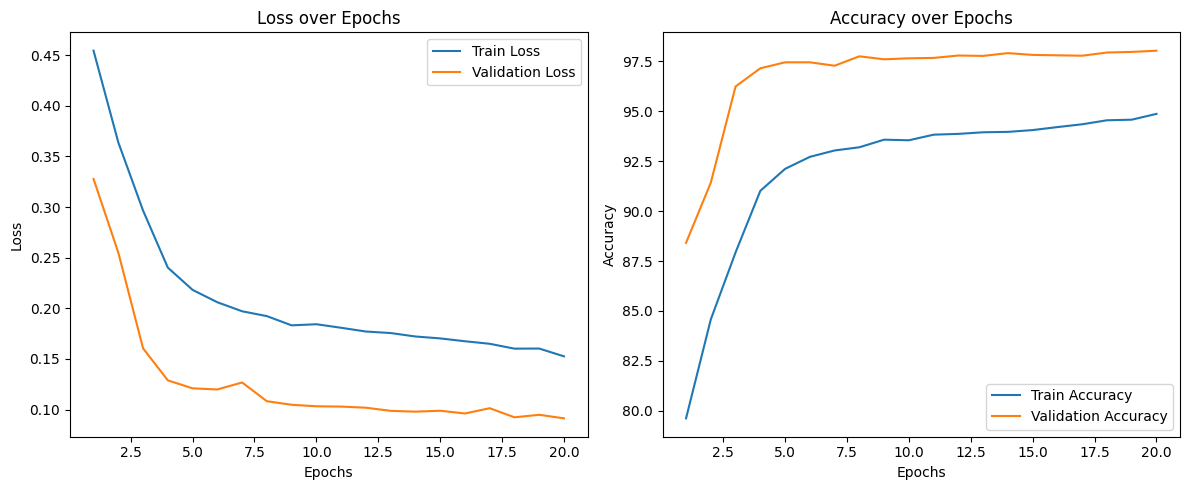

In [2]:
import matplotlib.pyplot as plt

# Metrics for visualization
epochs = list(range(1, 21))
train_loss = [0.4543, 0.3638, 0.2965, 0.2402, 0.2182, 0.2060, 0.1971, 0.1923, 0.1832, 0.1843,
              0.1808, 0.1771, 0.1756, 0.1722, 0.1703, 0.1675, 0.1650, 0.1602, 0.1603, 0.1526]
val_loss = [0.3277, 0.2550, 0.1605, 0.1289, 0.1210, 0.1199, 0.1268, 0.1083, 0.1048, 0.1033,
            0.1030, 0.1019, 0.0988, 0.0980, 0.0989, 0.0962, 0.1014, 0.0924, 0.0949, 0.0914]
train_accuracy = [79.63, 84.58, 87.93, 91.01, 92.11, 92.71, 93.03, 93.19, 93.57, 93.54,
                  93.82, 93.86, 93.94, 93.96, 94.05, 94.20, 94.34, 94.54, 94.57, 94.86]
val_accuracy = [88.41, 91.42, 96.23, 97.14, 97.44, 97.44, 97.27, 97.74, 97.59, 97.64,
                97.66, 97.78, 97.76, 97.90, 97.81, 97.79, 97.77, 97.93, 97.96, 98.02]

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label="Train Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


## Estimating Epistemic Uncertainty Using Monte Carlo (MC) Dropout

In deep learning, estimating **epistemic uncertainty** helps understand the uncertainty in model predictions due to lack of knowledge or model misspecification. One effective method for estimating epistemic uncertainty is **Monte Carlo (MC) Dropout**.

### Why MC Dropout?

Monte Carlo Dropout is a technique that leverages the dropout regularization used during training and applies it during inference as well. Typically, dropout is disabled during testing to make stable predictions; however, by keeping dropout enabled during inference and performing multiple forward passes, it is possible to simulate an ensemble of models. This allows for the estimation of the **epistemic uncertainty** in the model's predictions.

---

### How MC Dropout Works:

1. **Forward Pass with Dropout**: During inference, instead of using the trained model with dropout disabled, dropout is maintained. This means that each forward pass generates slightly different predictions due to the randomness introduced by dropout.

2. **Multiple Forward Passes**: A set number of forward passes (referred to as **MC samples**) are run, each with a different random dropout mask. These forward passes generate a distribution of predictions.

3. **Prediction and Uncertainty**:
   - **Mean Prediction**: The predictions from all forward passes are averaged to obtain the final predicted class probabilities.
   - **Uncertainty**: The **epistemic uncertainty** is calculated by measuring the variance (or entropy) of the predictions across the forward passes. Higher variance indicates higher uncertainty, while lower variance suggests the model is more confident in its prediction.

---

### Advantages of MC Dropout:

- **Simplicity**: MC Dropout is a straightforward and computationally efficient method to estimate uncertainty. It does not require training multiple models or adding complexity to the architecture. Instead, it uses the existing model with dropout during inference, making it easy to implement.
  
- **Effectiveness**: This method approximates **Bayesian inference**, which is traditionally used for uncertainty estimation in probabilistic models, providing a reliable way to quantify uncertainty.

- **Compatibility**: Since dropout is already implemented in the model, extending it for MC Dropout requires minimal changes. This makes MC Dropout a natural and effective extension for models that already utilize dropout for regularization.

---

### How MC Dropout Is Applied:

MC Dropout is applied by maintaining dropout during inference and performing multiple forward passes. This enables the model to simulate an ensemble of predictions, which can then be used to compute both the mean prediction and the variance across the predictions, thus quantifying epistemic uncertainty.

---

### Benefits in Model Evaluation:

By incorporating MC Dropout, the model not only provides predictions but also estimates how confident it is in those predictions. This uncertainty estimation can be critical in applications where decision-making depends on the confidence of the model. For instance, high uncertainty may prompt further investigation or flag cases where the model is uncertain, indicating a need for more data or model improvement.

MC Dropout allows for **uncertainty quantification** in a computationally efficient manner, offering an easy way to incorporate uncertainty into the decision-making process. This method is valuable for comparing models based on both accuracy and uncertainty, providing a more comprehensive understanding of model performance.

---

### Conclusion:

MC Dropout is an effective and simple technique for estimating epistemic uncertainty in deep learning models. By maintaining dropout during inference and performing multiple forward passes, this method provides a distribution of predictions that can be used to assess both the model's predictions and its uncertainty. This approach is particularly useful for understanding model confidence and for comparing performance across different models or settings.


In [1]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define the PulseShapeDataset class
class PulseShapeDataset(Dataset):
    def __init__(self, li6_data, po_data, transform=None):
        self.data = np.concatenate((li6_data, po_data), axis=0)
        self.labels = np.concatenate((np.zeros(len(li6_data)), np.ones(len(po_data))), axis=0)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            sample = self.transform(sample)
        return {'waveform': torch.tensor(sample, dtype=torch.float32), 'label': torch.tensor(label, dtype=torch.long)}

# Load the data from npz files
li6_data = np.load('/kaggle/input/py-datasets/Li6.npz')['data_array']
po_data = np.load('/kaggle/input/py-datasets/Po.npz')['data_array']

# Create the dataset
full_dataset = PulseShapeDataset(li6_data, po_data)

# Dataset Split (80-20)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Define the EnhancedCNN model with MC Dropout
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = None
        self.fc2 = nn.Linear(256, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        device = x.device
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        conv_out_size = x.size(2)
        fc1_input_dim = 64 * conv_out_size
        if self.fc1 is None:
            self.fc1 = nn.Linear(fc1_input_dim, 256).to(device)
        x = x.view(-1, fc1_input_dim)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    def predict(self, x, num_forward_passes):
        self.train()  # Keep dropout enabled
        preds = torch.zeros((num_forward_passes, x.size(0), 2), device=x.device)
        for i in range(num_forward_passes):
            preds[i] = self.forward(x)
        mean_preds = preds.mean(dim=0)
        uncertainty = preds.var(dim=0).mean(dim=1)  # Variance across passes
        return mean_preds, uncertainty

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EnhancedCNN().to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the training and evaluation function with uncertainty
def train_and_evaluate_with_uncertainty(model, train_loader, val_loader, num_epochs=20, num_forward_passes=100):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs in train_loader:
            inputs['waveform'], inputs['label'] = inputs['waveform'].to(device), inputs['label'].to(device)
            optimizer.zero_grad()
            outputs = model(inputs['waveform'])
            loss = criterion(outputs, inputs['label'])
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += inputs['label'].size(0)
            correct += (predicted == inputs['label']).sum().item()

        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {running_loss/len(train_loader):.4f} | Train Accuracy: {train_accuracy:.2f}%")

        # Validation phase with uncertainty estimation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        uncertainty_total = 0.0
        with torch.no_grad():
            for inputs in val_loader:
                inputs['waveform'], inputs['label'] = inputs['waveform'].to(device), inputs['label'].to(device)
                
                # Ensure predictions and uncertainties are on the same device
                mean_preds, uncertainty = model.predict(inputs['waveform'], num_forward_passes)
                mean_preds = mean_preds.to(device)  # Move mean_preds to GPU if required
                
                val_loss += criterion(mean_preds, inputs['label']).item()
                _, predicted = torch.max(mean_preds, 1)
                total += inputs['label'].size(0)
                correct += (predicted == inputs['label']).sum().item()
                uncertainty_total += uncertainty.mean().item()

        val_accuracy = 100 * correct / total
        print(f"Validation Loss: {val_loss/len(val_loader):.4f} | Validation Accuracy: {val_accuracy:.2f}% | Avg Uncertainty: {uncertainty_total/len(val_loader):.4f}")

# Train and evaluate the model
train_and_evaluate_with_uncertainty(model, train_loader, val_loader)


Epoch 1/20 | Train Loss: 0.4458 | Train Accuracy: 80.39%
Validation Loss: 0.2784 | Validation Accuracy: 89.94% | Avg Uncertainty: 0.7543
Epoch 2/20 | Train Loss: 0.2978 | Train Accuracy: 88.29%
Validation Loss: 0.1614 | Validation Accuracy: 96.00% | Avg Uncertainty: 1.0105
Epoch 3/20 | Train Loss: 0.2435 | Train Accuracy: 90.97%
Validation Loss: 0.1222 | Validation Accuracy: 97.14% | Avg Uncertainty: 1.1830
Epoch 4/20 | Train Loss: 0.2202 | Train Accuracy: 92.07%
Validation Loss: 0.1206 | Validation Accuracy: 97.11% | Avg Uncertainty: 1.2652
Epoch 5/20 | Train Loss: 0.2101 | Train Accuracy: 92.45%
Validation Loss: 0.1126 | Validation Accuracy: 97.34% | Avg Uncertainty: 1.1134
Epoch 6/20 | Train Loss: 0.2024 | Train Accuracy: 92.84%
Validation Loss: 0.1086 | Validation Accuracy: 97.47% | Avg Uncertainty: 1.1137
Epoch 7/20 | Train Loss: 0.1944 | Train Accuracy: 93.16%
Validation Loss: 0.1071 | Validation Accuracy: 97.38% | Avg Uncertainty: 1.1364
Epoch 8/20 | Train Loss: 0.1920 | Train A

## Code Explanation: Selecting Optimal Threshold and Classification with Contamination Control

### Overview

The purpose of this code is to select an optimal threshold for classification, ensuring that the contamination level of Po (Polonium) signals is controlled, while also maximizing the retention of Li6 (Lithium-6) signals. The model uses Monte Carlo (MC) Dropout to estimate uncertainty and predictions through stochastic forward passes. The optimal threshold is chosen based on the trade-off between the contamination rate of Po signals classified as Li6 and the retention of actual Li6 signals.

---

### `select_threshold` Function

This function selects the optimal threshold for classification based on a specified contamination level. The threshold is determined by evaluating the model's predictions and calculating how well it can balance the retention of Li6 signals and the correct classification of Po signals.

#### Parameters:
- **model**: A trained deep learning model that includes MC Dropout for uncertainty estimation.
- **val_loader**: A DataLoader object that loads the validation dataset.
- **contamination_level**: The maximum allowed contamination level for Po signals. This represents the fraction of Po signals that can be mistakenly classified as Li6.
- **num_forward_passes**: The number of stochastic forward passes to perform for uncertainty estimation using MC Dropout.

#### Process:
1. **Model Evaluation**: The model is set to evaluation mode (`model.eval()`) to ensure that dropout remains active during inference, allowing for multiple stochastic forward passes.
2. **Prediction Generation**: The model performs multiple forward passes on the validation set (`num_forward_passes`), and for each sample, the mean prediction probabilities are computed. The Po class probabilities are extracted using `softmax`.
3. **Threshold Search**: The function searches for the threshold value that results in the desired contamination level while also maximizing the retention of Li6 signals. 
   - **Contamination Rate**: The rate at which Po signals are classified as Li6 is computed.
   - **Li6 Retention**: The rate at which Li6 signals are correctly classified is computed.
4. **Threshold Selection**: The function iterates over a range of possible threshold values (from 0 to 1) and selects the threshold that minimizes contamination while maximizing Li6 retention.

The function returns the **best threshold** found based on the desired contamination level.

---

### `classify_with_threshold` Function

This helper function takes the predicted probabilities and applies the optimal threshold to classify the signals as either Li6 (0) or Po (1). If the probability of Po exceeds the threshold, the signal is classified as Po.

#### Parameters:
- **probabilities**: The predicted probabilities of the Po class for each sample.
- **threshold**: The optimal threshold value determined by the `select_threshold` function.

#### Process:
- The function compares the predicted probability of Po with the threshold. If the probability exceeds the threshold, the sample is classified as Po (1), otherwise, it is classified as Li6 (0).

---

### Example Usage During Validation

After selecting the optimal threshold using the `select_threshold` function, the model is used for inference on the validation set.

1. **Model Evaluation**: The model is set to evaluation mode to ensure dropout is enabled.
2. **Predictions**: For each batch in the validation set, the model performs multiple forward passes to obtain the mean Po class probabilities. 
3. **Classification**: The `classify_with_threshold` function is applied to classify the samples based on the optimal threshold.
4. **Results**: The model produces classifications for each validation sample using the optimal threshold.

---

### Key Concepts

- **Contamination Level**: The proportion of Po signals that can be wrongly classified as Li6. The goal is to minimize this contamination while ensuring good retention of Li6 signals.
- **Monte Carlo Dropout**: This technique is used to generate uncertainty estimates by performing multiple stochastic forward passes during inference, allowing the model to quantify epistemic uncertainty in its predictions.
- **Threshold Optimization**: The threshold is adjusted to balance between reducing contamination and maximizing correct classification of Li6 samples, achieving the desired contamination level.

---

### Conclusion

The code provided allows for the selection of an optimal threshold that balances the contamination of Po signals and the retention of Li6 signals. This is achieved by using MC Dropout to generate multiple stochastic forward passes, which provides uncertainty estimates to fine-tune the classification threshold. By optimizing this threshold, the model can maintain a contamination level of Po signals while ensuring high performance in classifying Li6 signals correctly.


In [4]:
def select_threshold(model, val_loader, contamination_level=0.05, num_forward_passes=100):
    """
    Selects the optimal threshold to limit Po contamination to the specified level.
    Args:
        model: Trained model
        val_loader: DataLoader for the validation set
        contamination_level: Maximum allowed contamination level for Po signals
        num_forward_passes: Number of stochastic forward passes for uncertainty estimation
    Returns:
        optimal_threshold: The threshold that achieves the desired contamination level
    """
    model.eval()
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for inputs in val_loader:
            inputs['waveform'], inputs['label'] = inputs['waveform'].to(device), inputs['label'].to(device)
            mean_preds, _ = model.predict(inputs['waveform'], num_forward_passes)
            probs = torch.softmax(mean_preds, dim=1)[:, 1]  # Probability of Po
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(inputs['label'].cpu().numpy())
    
    # Convert to numpy arrays for processing
    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)
    
    # Sort probabilities and calculate contamination rate
    thresholds = np.linspace(0, 1, 1000)  # Fine-grained thresholds
    best_threshold = 0.5  # Default threshold
    max_li6_retained = 0
    
    for threshold in thresholds:
        predictions = (all_probs > threshold).astype(int)
        po_predicted_as_li6 = np.sum((predictions == 0) & (all_labels == 1))
        total_po = np.sum(all_labels == 1)
        contamination_rate = po_predicted_as_li6 / total_po if total_po > 0 else 0
        
        li6_retained = np.sum((predictions == 0) & (all_labels == 0))
        total_li6 = np.sum(all_labels == 0)
        li6_retention_rate = li6_retained / total_li6 if total_li6 > 0 else 0
        
        if contamination_rate <= contamination_level and li6_retention_rate > max_li6_retained:
            best_threshold = threshold
            max_li6_retained = li6_retention_rate

    print(f"Optimal Threshold: {best_threshold:.4f} | Li6 Retention Rate: {max_li6_retained:.4f}")
    return best_threshold

# Use the function to select the threshold
optimal_threshold = select_threshold(model, val_loader, contamination_level=0.05)

# Use the optimal threshold for classification in your predictions
def classify_with_threshold(probabilities, threshold):
    return (probabilities > threshold).astype(int)

# Example usage during validation
model.eval()
with torch.no_grad():
    for inputs in val_loader:
        inputs['waveform'] = inputs['waveform'].to(device)
        mean_preds, _ = model.predict(inputs['waveform'], num_forward_passes=100)
        probs = torch.softmax(mean_preds, dim=1)[:, 1].cpu().numpy()  # Probability of Po
        predictions = classify_with_threshold(probs, optimal_threshold)


Optimal Threshold: 0.8118 | Li6 Retention Rate: 0.9874


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/py-datasets/Phys (1).npz
/kaggle/input/py-datasets/Po.npz
/kaggle/input/py-datasets/Li6.npz


## Code Explanation: Running the Classifier on the Phys Dataset

### Overview

This code demonstrates how to use a trained model to classify signals from the Phys dataset. The goal is to estimate the number of Li6 (Lithium-6) and Po (Polonium) signals in the dataset based on the model's predictions. The code loads the Phys dataset, prepares the data using a custom dataset class, and then applies the model to make predictions. The classifier uses a predefined optimal threshold to categorize each signal as either Li6 or Po.

---

### Step-by-Step Breakdown

1. **Loading the Phys Dataset**
   - The Phys dataset is loaded from a `.npz` file using NumPy's `np.load()` function. This dataset contains waveform data that needs to be classified into two categories (Li6 and Po).
   
2. **Creating the PhysDataset Class**
   - A custom `PhysDataset` class is defined that inherits from PyTorch's `Dataset`. This class takes the loaded `phys_data` as input and stores it. Optionally, a transformation can be applied to the data.
   
   - The `__getitem__` method is implemented to return individual waveforms as PyTorch tensors.

3. **Creating the DataLoader**
   - The `PhysDataset` is passed into a PyTorch `DataLoader`, which handles batching and shuffling of the data. In this case, shuffling is set to `False` since the data is being processed in order.

4. **Running the Model and Estimating Li6 and Po Signals**
   - The model is set to evaluation mode using `model.eval()`, ensuring dropout layers are disabled and the model behaves deterministically during inference.
   
   - A `threshold` value of 0.8118 is used for classification. This threshold separates the predictions into two classes: Po and Li6. The model computes the softmax probabilities of each class, and predictions are made by comparing the probability of the Po class (`probs[:, 1]`) to the threshold. If the probability exceeds the threshold, the signal is classified as Po, otherwise, it is classified as Li6.
   
   - The loop iterates over the batches in `phys_loader`. For each batch, the model generates predictions for each waveform in the batch, and the counts of Li6 and Po signals are updated.

5. **Output**
   - The output prints the estimated number of Li6 and Po signals in the Phys dataset based on the model's predictions. In this case, the model estimates:




These values represent the classifier's predictions for the Phys dataset, based on the optimal threshold for Po contamination.

---

### Conclusion

This code demonstrates how to classify and estimate the number of Li6 and Po signals in a given dataset using a trained deep learning model. The key steps involve data preparation, inference with a trained model, and applying a threshold to make final classifications. The model's performance is evaluated by counting the number of predicted signals for each class, providing insights into the composition of the dataset.


In [8]:
# Load the Phys dataset
phys_data = np.load('/kaggle/input/py-datasets/Phys (1).npz')['data_array']

# Create a dataset for Phys
class PhysDataset(Dataset):
    def __init__(self, phys_data, transform=None):
        self.data = phys_data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return torch.tensor(sample, dtype=torch.float32)

phys_dataset = PhysDataset(phys_data)
phys_loader = DataLoader(phys_dataset, batch_size=64, shuffle=False)

# Run the classifier on Phys dataset
model.eval()
li6_count = 0
po_count = 0
threshold = 0.8118  # Optimal threshold

with torch.no_grad():
    for waveforms in phys_loader:
        waveforms = waveforms.to(device)
        mean_preds, _ = model.predict(waveforms, num_forward_passes=100)
        probs = torch.softmax(mean_preds, dim=1)[:, 1].cpu().numpy()  # Probability of Po
        predictions = (probs > threshold).astype(int)  # Classify using threshold
        po_count += np.sum(predictions)  # Count Po signals
        li6_count += len(predictions) - np.sum(predictions)  # Count Li6 signals

print(f"Estimated Li6 signals: {li6_count}")
print(f"Estimated Po signals: {po_count}")


Estimated Li6 signals: 2906
Estimated Po signals: 21094


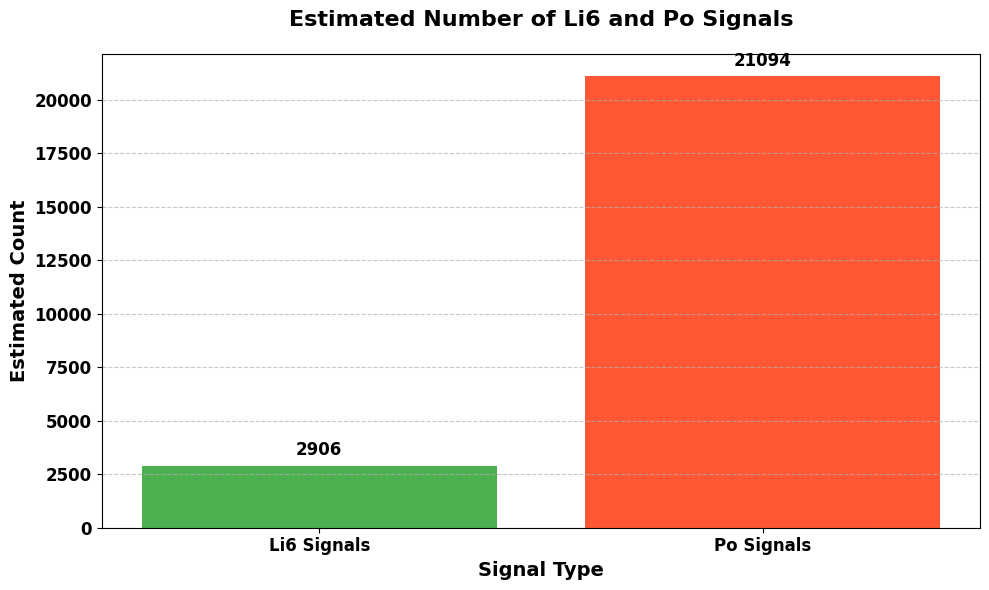

In [13]:
import matplotlib.pyplot as plt

# Data for Li6 and Po signals
li6_signals = 2906
po_signals = 21094

# Labels for the categories
labels = ['Li6 Signals', 'Po Signals']
values = [li6_signals, po_signals]

# Set up the figure with a larger size
plt.figure(figsize=(10, 6))

# Plotting the bar chart with customized aesthetics
bars = plt.bar(labels, values, color=['#4CAF50', '#FF5733'])

# Adding title and labels
plt.title('Estimated Number of Li6 and Po Signals', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Signal Type', fontsize=14, fontweight='bold')
plt.ylabel('Estimated Count', fontsize=14, fontweight='bold')

# Adding value annotations on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 500, 
             f'{int(bar.get_height())}', 
             ha='center', fontsize=12, fontweight='bold', color='black')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize tick parameters for readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()
